In [60]:

import numpy as np
import pandas as pd
import os
from pathlib import Path
import re
import seaborn as sns

In [6]:
df = pd.read_csv('../biased_model_mnli_test.csv',index_col=0)


In [12]:
df['1'][0]

'tensor(68.4564)'

In [21]:
def parse_csv(df, dataset):
    df['batch_num'] = df['0'].str.extract(r'_[0-1]_(.*).pt')
    df['model_type'] = df['0'].str.extract(r'(.*)_model/')
    df['accuracy'] = df['1'].str.extract(r'\((.*)\)')
    df['dataset'] = dataset
    df = df[['batch_num','model_type','accuracy','dataset']]
    return df
    

In [61]:
df = None
for filename in Path('../').glob('*.csv'):
    print(str(filename))
    name = re.search(r'model_(.*)_',str(filename)).group(1)
    read_pd = parse_csv(pd.read_csv(filename,index_col=0),name )
    if df is None:
        df = read_pd
    else:
        df = pd.concat([df,read_pd])
    df['batch_num'] = df['batch_num'].astype('float')
    df['accuracy'] = df['accuracy'].astype('float')
    df['category'] = df['model_type'] + '_' + df['dataset']

../biased_model_snli_test.csv
../debiased_model_mnli_test.csv
../biased_model_mnli_test.csv
../debiased_model_snli_test.csv


In [62]:
df

,batch_num,model_type,accuracy,dataset,category
0,10000.0,biased,84.45,snli,biased_snli
1,15000.0,biased,84.65,snli,biased_snli
2,20000.0,biased,85.57,snli,biased_snli
3,25000.0,biased,84.93,snli,biased_snli
4,30000.0,biased,85.73,snli,biased_snli
...,...,...,...,...,...
35,180000.0,debiased,81.68,snli,debiased_snli
36,185000.0,debiased,82.54,snli,debiased_snli
37,190000.0,debiased,82.73,snli,debiased_snli
38,195000.0,debiased,83.34,snli,debiased_snli


<AxesSubplot:xlabel='batch_num'>

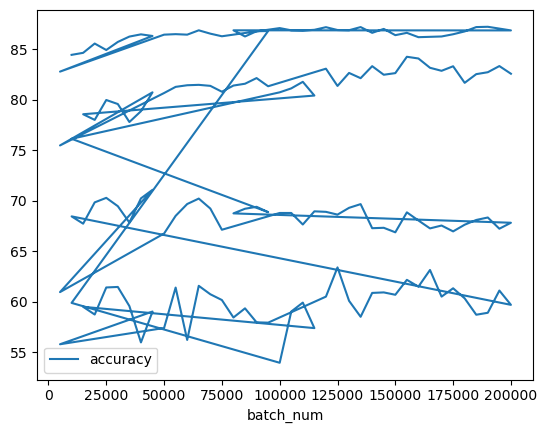

In [63]:
df.plot.line('batch_num','accuracy',)

<AxesSubplot:xlabel='batch_num', ylabel='accuracy'>

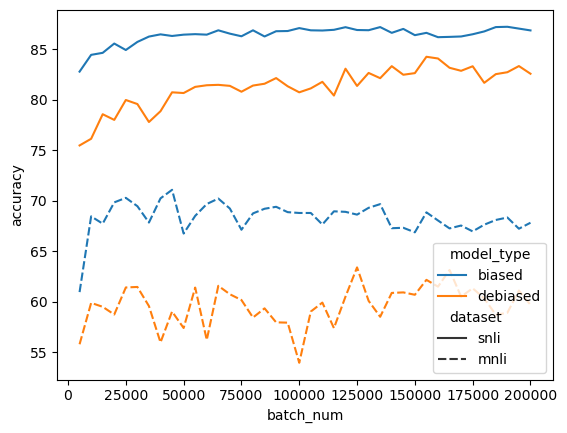

In [65]:
sns.lineplot(df,x='batch_num',y='accuracy',hue='model_type', style='dataset')